数据集
https://openneuro.org/datasets/ds00306/versions/1.1.2

/Users/tl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/tl/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/tl/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/tl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/tl/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/tl/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.st

loading data successfully


<ipython-input-2-2576d856ce9a>:7: RuntimeWarning: Unknown types found, setting as type EEG:
temp: ['Temp']
  raw = mne.io.read_raw(data_path)
<ipython-input-2-2576d856ce9a>:7: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw(data_path)


Using matplotlib as 2D backend.


<ipython-input-2-2576d856ce9a>:7: RuntimeWarning: Not setting positions of 14 gsr/misc/resp channels found in montage:
['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw(data_path)
/Users/tl/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:214: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


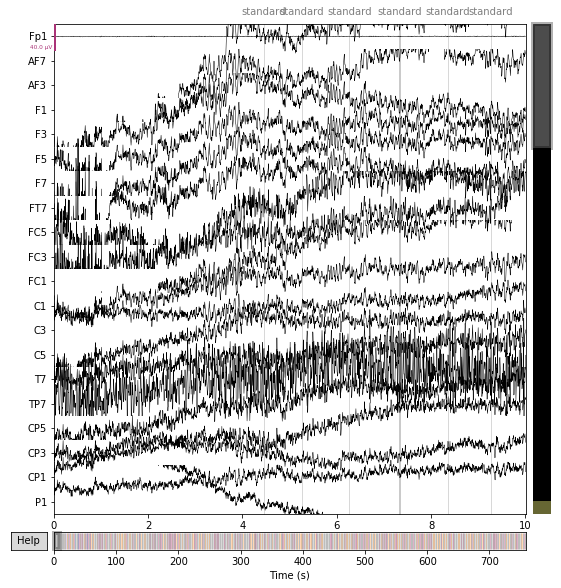

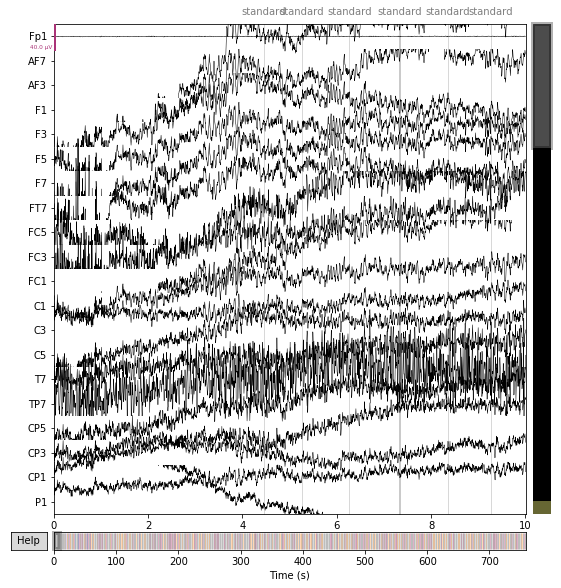

In [2]:
import mne
import matplotlib

matplotlib.use('Qt5Agg')
data_path = 'dataset/sub-001_task-P300_run-1_eeg.set'
print("loading data successfully")
raw = mne.io.read_raw(data_path)

raw.plot()

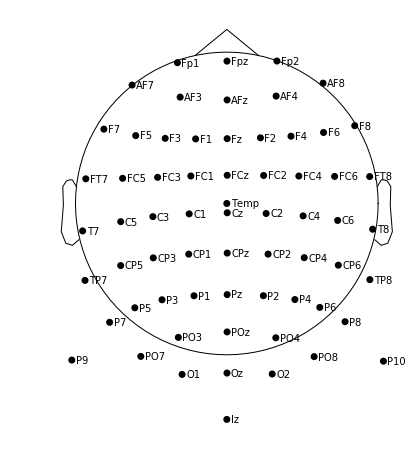

In [3]:
# 通道的位置和名字
raw.plot_sensors(ch_type='eeg', show_names=True)
plt.show()

780s的eeg的数据13分钟：750刺激，70%标准刺激，500HZ纯音，持续60s
30%的偏差刺激，15%靶刺激，15%干扰刺激

提高信噪比，减少噪声
伪记：
- 生理（眨眼、肌肉信号、心跳信号等）
- 非生理（手机电梯磁场、关门时的震荡等）

处理方法：
1. 不处理
2. 排除：去除坏的电极、去除受影响的试次
3. 修复：滤波、ICA、回归（差值坏导等）

In [4]:
# 差值坏导 定义电极位置
raw.set_montage(montage = 'standard_1020', on_missing='ignore')
# 查看坏导
raw.info

# raw.info['bads'].remove('FPE')  # 移除指定的坏道
# 标记坏导(坏的电极)，认为收集到的数据是不能用的
raw.info['bads'] = ['C1', 'T7', 'Fp1', 'Temp']
raw.info['bads']

['C1', 'T7', 'Fp1', 'Temp']

In [5]:
# 差值法处理坏导，可以用周围的做一个回归分析，预测坏的位置的电势差
raw.load_data()  # 读进内存
raw.interpolate_bads(exclude=['Temp']) 
raw.info['bads']

Interpolating bad channels
    Automatic origin fit: head of radius 96.2 mm
Computing interpolation matrix from 61 sensor positions
Interpolating 3 sensors


['Temp']

滤波


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


/Users/tl/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


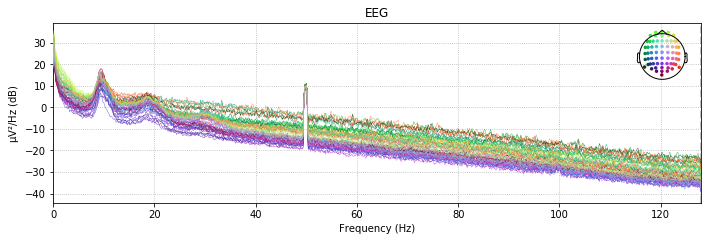

In [6]:
raw.plot_psd() # 显示功率谱密度

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 8449 samples (33.004 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwid

/Users/tl/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


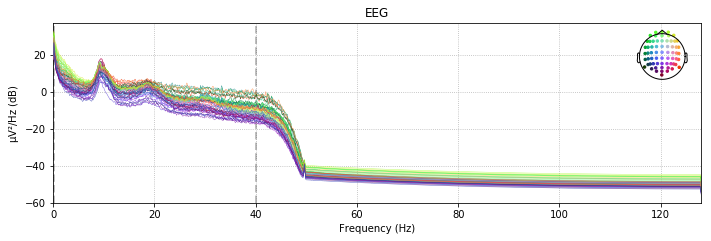

In [8]:
raw.filter(l_freq=0.1, h_freq=40) # 衰减频率<0.1hz和>40hz的信号
raw.notch_filter(freqs=50) # 去除50hz的交流电频率干扰
raw.plot_psd()